In [1]:
# install the data-depth package
# pip install data-depth

In [2]:
# works on numpy 1.26.4, matplotlib 3.9.2 and data_depth 1.0.1
import numpy as np
import matplotlib.pyplot as plt
from depth.multivariate import simplicial

In [3]:
# parameter settings
np.random.seed(123)
n = 100     # number of observations
p = 2   # number of dimensions
r = np.array([3, 1])
s = np.array([1, 2])
f = 4/10

# generate data
d = np.zeros((n, p))    # initialize matrix
d[:, 0] = np.concatenate([r[0] + np.random.uniform(size=int((1 - f) * n)), r[1] + np.random.uniform(size=int(f * n))])  # uniform numbers shifted by r
d[:, 1] = 6.28 * np.random.uniform(size=n)  # the second column has 100 random numbers from uniform distribution

c = np.vstack([np.zeros((int((1 - f) * n), 2)), np.tile(s, (int(f * n), 1))])   # first 1-f rows equals to zero, last f rows equal to s

x = np.zeros((n, p))    # initialize matrix
x[:, 0] = c[:, 0] + d[:, 0] * np.cos(d[:, 1])   # rotate data and shift by c
x[:, 1] = c[:, 1] + d[:, 0] * np.sin(d[:, 1])

In [4]:
# compute simplicial depth
depths = simplicial(x, data=x, exact=True)

# find the median (point with maximum depth)
median_point = x[np.argmax(depths)]

In [5]:
# normalize depths to a scale of 1-10
col = np.round(10 * depths / np.max(depths)).astype(int)

# map each category to a symbol 
symbol_map = {
    1: {"marker": "o", "facecolor": "none", "edgecolor": "blue"},  # non-filled circle
    2: {"marker": "v", "facecolor": "none", "edgecolor": "blue"},  # non-filled triangle down
    3: {"marker": "x", "facecolor": "blue", "edgecolor": "blue"},  # cross
    4: {"marker": "X", "facecolor": "blue", "edgecolor": "blue"},  # x-symbol
    5: {"marker": "D", "facecolor": "none", "edgecolor": "blue"},  # non-filled rhombus
    6: {"marker": "^", "facecolor": "none", "edgecolor": "blue"},  # non-filled triangle up
    7: {"marker": "s", "facecolor": "blue", "edgecolor": "blue"},  # filled square
    8: {"marker": "o", "facecolor": "blue", "edgecolor": "blue"},  # filled circle
    9: {"marker": "^", "facecolor": "blue", "edgecolor": "blue"},  # filled triangle
    10: {"marker": "s", "facecolor": "blue", "edgecolor": "blue"}  # filled square
}

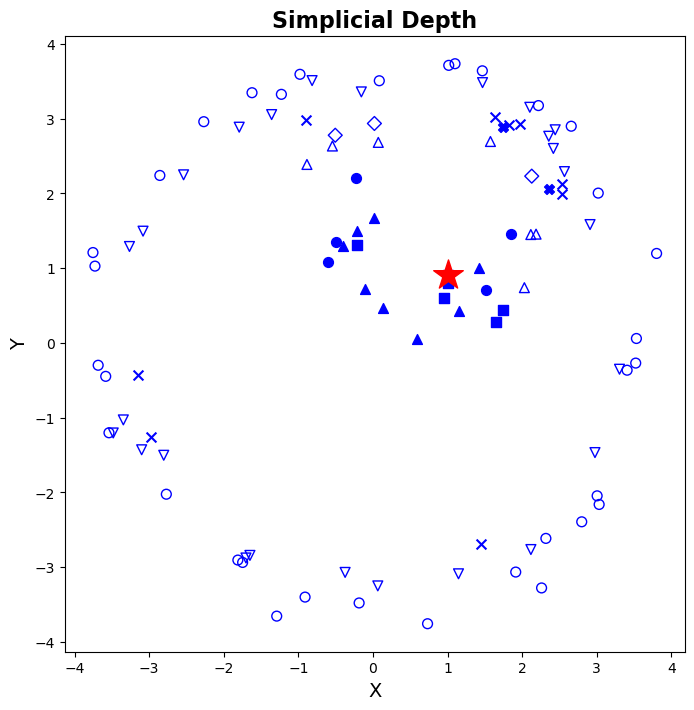

In [6]:
# plot
plt.figure(figsize=(8, 8))
for i, point in enumerate(x):
    props = symbol_map[col[i]]
    # handle edgecolor and facecolor
    if props["facecolor"] == "none":
        plt.scatter(
            point[0], point[1],
            marker=props["marker"],
            edgecolors=props["edgecolor"],
            facecolors="none",
            s=50
        )
    else:
        plt.scatter(
            point[0], point[1],
            marker=props["marker"],
            c=props["facecolor"],
            s=50
        )

# median as a big red star
plt.scatter(median_point[0], median_point[1], c="red", marker="*", s=500, label="Median")
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.title("Simplicial Depth", fontsize=16, fontweight="bold")
plt.show()